In [7]:
import json
import requests
from dotenv import load_dotenv
import os

load_dotenv()
API_KEY = os.getenv("NASDAQ_DATA_LINK_API_KEY")

CLIENT_ID = os.getenv("TS_CLIENT_ID")
CLIENT_SECRET = os.getenv("TS_CLIENT_SECRET")
REFRESH_TOKEN = os.getenv("TS_REFRESH_TOKEN")


In [8]:
def get_access_token():
    url = "https://signin.tradestation.com/oauth/token"

    payload=f'grant_type=refresh_token&client_id={CLIENT_ID}&client_secret={CLIENT_SECRET}&refresh_token={REFRESH_TOKEN}'
    headers = {
      'Content-Type': 'application/x-www-form-urlencoded'
    }

    response = requests.request("POST", url, headers=headers, data=payload)
    response_data = response.json()
    return response_data['access_token']

In [9]:
url = "https://api.tradestation.com/v3/marketdata/barcharts/NVDA?barsback=1&lastdate=2025-01-13"
access_token = get_access_token() # get a new access token

headers = {'Authorization': f'Bearer {access_token}' }

response = requests.request("GET", url, headers=headers)
json_data = response.json()
print(json.dumps(json_data, indent=4, sort_keys=False))

{
    "Bars": [
        {
            "High": "133.49",
            "Low": "129.51",
            "Open": "129.99",
            "Close": "133.23",
            "TimeStamp": "2025-01-13T21:00:00Z",
            "TotalVolume": "204808914",
            "DownTicks": 946531,
            "DownVolume": 113464760,
            "OpenInterest": "0",
            "IsRealtime": false,
            "IsEndOfHistory": true,
            "TotalTicks": 1885760,
            "UnchangedTicks": 0,
            "UnchangedVolume": 0,
            "UpTicks": 939229,
            "UpVolume": 91344153,
            "Epoch": 1736802000000,
            "BarStatus": "Closed"
        }
    ]
}


In [10]:
url = "https://api.tradestation.com/v3/marketdata/barcharts/NVDA?barsback=10000"


access_token = get_access_token() # get a new access token
headers = {'Authorization': f'Bearer {access_token}' }

response = requests.request("GET", url, headers=headers)
json_data = response.json()
print(json.dumps(json_data, indent=4, sort_keys=False))

{
    "Bars": [
        {
            "High": "0.04",
            "Low": "0.04",
            "Open": "0.04",
            "Close": "0.04",
            "TimeStamp": "1999-02-12T21:00:00Z",
            "TotalVolume": "109728000",
            "DownTicks": 0,
            "DownVolume": 54864000,
            "OpenInterest": "0",
            "IsRealtime": false,
            "IsEndOfHistory": false,
            "TotalTicks": 0,
            "UnchangedTicks": 0,
            "UnchangedVolume": 0,
            "UpTicks": 0,
            "UpVolume": 54864000,
            "Epoch": 918853200000,
            "BarStatus": "Closed"
        },
        {
            "High": "0.05",
            "Low": "0.04",
            "Open": "0.04",
            "Close": "0.04",
            "TimeStamp": "1999-02-16T21:00:00Z",
            "TotalVolume": "211008000",
            "DownTicks": 0,
            "DownVolume": 105504000,
            "OpenInterest": "0",
            "IsRealtime": false,
            "IsEndOfHistory"

In [11]:
# create a dataframe from the json data

import pandas as pd
df = pd.DataFrame(json_data['Bars'])

df.head(10)


High   Low  Open Close             TimeStamp TotalVolume  DownTicks  \
0  0.04  0.04  0.04  0.04  1999-02-12T21:00:00Z   109728000          0   
1  0.05  0.04  0.04  0.04  1999-02-16T21:00:00Z   211008000          0   
2  0.04  0.04  0.04  0.04  1999-02-17T21:00:00Z    67728000          0   
3  0.04  0.04  0.04  0.04  1999-02-18T21:00:00Z    70704000          0   
4  0.04  0.04  0.04  0.04  1999-02-19T21:00:00Z    75360000          0   
5  0.04  0.04  0.04  0.04  1999-02-22T21:00:00Z   205248000          0   
6  0.05  0.04  0.04  0.05  1999-02-23T21:00:00Z   138096000          0   
7  0.05  0.05  0.05  0.05  1999-02-24T21:00:00Z   612768000          0   
8  0.05  0.05  0.05  0.05  1999-02-25T21:00:00Z   149136000          0   
9  0.05  0.05  0.05  0.05  1999-02-26T21:00:00Z   172608000          0   

   DownVolume OpenInterest  IsRealtime  IsEndOfHistory  TotalTicks  \
0    54864000            0       False           False           0   
1   105504000            0       False           False           0   
2    33864000            0       False           False           0   
3    35352000            0       False           False           0   
4    37680000            0       False           False           0   
5   102624000            0       False           False           0   
6    69048000            0       False           False           0   
7   306384000            0       False           False           0   
8    74568000            0       False           False           0   
9    86304000            0       False           False           0   

   UnchangedTicks  UnchangedVolume  UpTicks   UpVolume         Epoch BarStatus  
0               0                0        0   54864000  918853200000    Closed  
1               0                0        0  105504000  919198800000    Closed  
2               0                0        0   33864000  919285200000    Closed  
3               0                0        0   35352000  919371600000    Closed  
4               0                0        0   37680000  919458000000    Closed  
5               0                0        0  102624000  919717200000    Closed  
6               0                0        0   69048000  919803600000    Closed  
7               0                0        0  306384000  919890000000    Closed  
8               0                0        0   74568000  919976400000    Closed  
9               0                0        0   86304000  920062800000    Closed

c:\Users\Afiat_Trading\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


High   Low  Open Close       Volume
TimeStamp                                                     
1999-02-12 21:00:00+00:00  0.04  0.04  0.04  0.04  109728000.0
1999-02-16 21:00:00+00:00  0.05  0.04  0.04  0.04  211008000.0
1999-02-17 21:00:00+00:00  0.04  0.04  0.04  0.04   67728000.0
1999-02-18 21:00:00+00:00  0.04  0.04  0.04  0.04   70704000.0
1999-02-19 21:00:00+00:00  0.04  0.04  0.04  0.04   75360000.0
1999-02-22 21:00:00+00:00  0.04  0.04  0.04  0.04  205248000.0
1999-02-23 21:00:00+00:00  0.05  0.04  0.04  0.05  138096000.0
1999-02-24 21:00:00+00:00  0.05  0.05  0.05  0.05  612768000.0
1999-02-25 21:00:00+00:00  0.05  0.05  0.05  0.05  149136000.0
1999-02-26 21:00:00+00:00  0.05  0.05  0.05  0.05  172608000.0

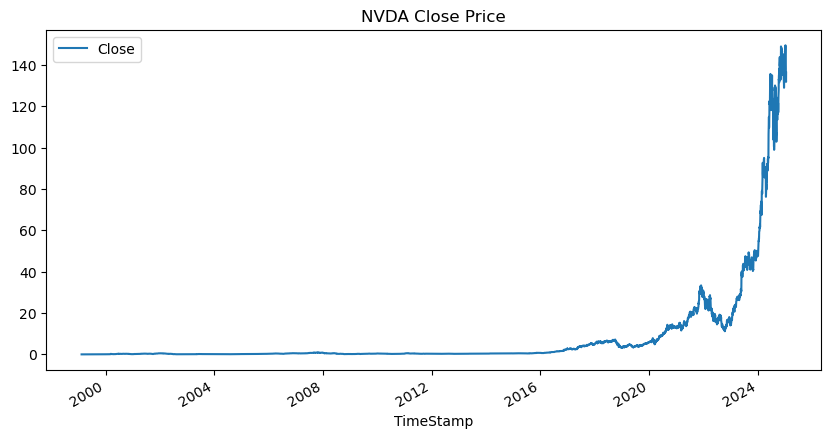

In [12]:
data = df[['TimeStamp','High', 'Low', 'Open', 'Close', 'TotalVolume']]
data.loc[:,'TimeStamp'] = pd.to_datetime(data['TimeStamp'])
data.loc[:,'High'] = data['High'].astype(float)
data.loc[:,'Low'] = data['Low'].astype(float)
data.loc[:,'Open'] = data['Open'].astype(float)
data.loc[:,'Close'] = data['Close'].astype(float)
data.loc[:,'TotalVolume'] = data['TotalVolume'].astype(float)
data = data.set_index('TimeStamp')

data.rename(columns={'TotalVolume': 'Volume'}, inplace=True)

plot = data.plot(y='Close', title='NVDA Close Price', figsize=(10,5))

data.head(10)